In [9]:
import pandas as pd
from glob import glob
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [10]:
df_dict = {}
for variable in ["air-temperature", "relative-humidity"]:
    df=pd.DataFrame()
    filenames = glob("DataGovSG/*_{}.csv".format(variable))
    #print(filenames)
    for filename in filenames:
        other_df = pd.read_csv(filename)
        other_df = other_df.rename(columns={"value": variable})
        other_df["timestamp_sgt"] = other_df["timestamp_sgt"].astype("datetime64[ns]")
        #print(other_df.head())
        df = df.append(other_df,ignore_index=True)
        #print(df.head())
    df_dict[variable] = df

In [11]:
outer_df = df_dict["air-temperature"].merge(df_dict["relative-humidity"], how="outer", on=["station_id","timestamp_sgt"])
outer_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3929868 entries, 0 to 3929867
Data columns (total 4 columns):
station_id           object
air-temperature      float64
timestamp_sgt        datetime64[ns]
relative-humidity    float64
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 149.9+ MB


In [12]:
station_S06 = outer_df[outer_df["station_id"]=="S06"].set_index("timestamp_sgt")

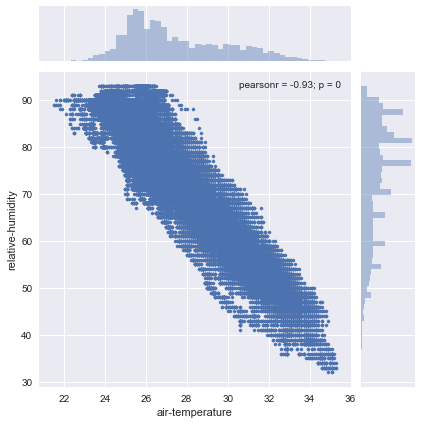

In [13]:
sns.jointplot(station_S06["air-temperature"],station_S06["relative-humidity"],kind="scatter",marker="o",s=10)

In [14]:
station_S06["air-temperature"]+=273
station_S06["specific-humidity"] = 0.00003750722*np.exp((2500.8-2.36*station_S06["air-temperature"])/0.461*(1/273-1/station_S06["air-temperature"]))*station_S06["relative-humidity"]
station_S06["specific-humidity"]

timestamp_sgt
2016-12-01 00:00:59    0.009602
2016-12-01 00:01:59    0.009602
2016-12-01 00:02:59    0.009602
2016-12-01 00:03:59    0.009641
2016-12-01 00:04:59    0.009641
2016-12-01 00:05:59    0.009641
2016-12-01 00:06:59    0.009641
2016-12-01 00:07:59    0.009641
2016-12-01 00:08:59    0.009641
2016-12-01 00:09:59    0.009641
2016-12-01 00:10:59    0.009641
2016-12-01 00:11:59    0.009641
2016-12-01 00:12:59    0.009641
2016-12-01 00:13:59    0.009641
2016-12-01 00:14:59    0.009641
2016-12-01 00:15:59    0.009641
2016-12-01 00:16:59    0.009602
2016-12-01 00:17:59    0.009781
2016-12-01 00:18:59    0.009641
2016-12-01 00:19:59    0.009781
2016-12-01 00:20:59    0.009641
2016-12-01 00:21:59    0.009641
2016-12-01 00:22:59    0.009641
2016-12-01 00:23:59    0.009641
2016-12-01 00:24:59    0.009781
2016-12-01 00:25:59    0.009741
2016-12-01 00:26:59    0.009741
2016-12-01 00:27:59    0.009741
2016-12-01 00:28:59    0.009741
2016-12-01 00:29:59    0.009741
                         .

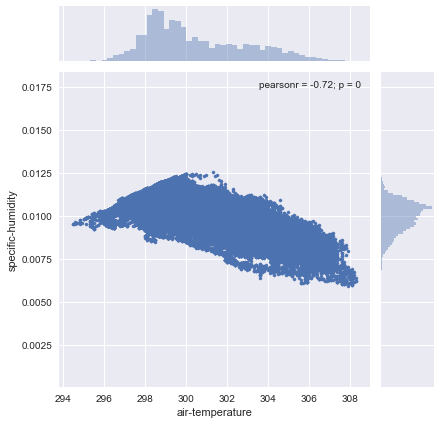

In [15]:
sns.jointplot(station_S06["air-temperature"],station_S06["specific-humidity"],kind="scatter",marker="o",s=10)

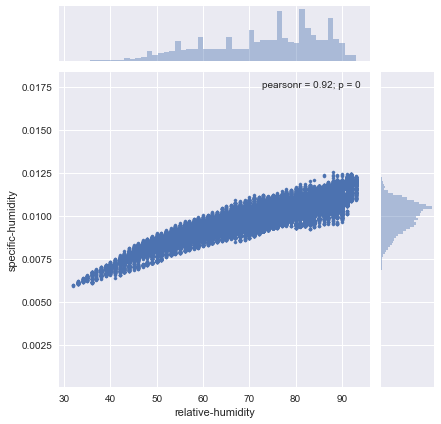

In [16]:
sns.jointplot(station_S06["relative-humidity"],station_S06["specific-humidity"],kind="scatter",marker="o",s=10)

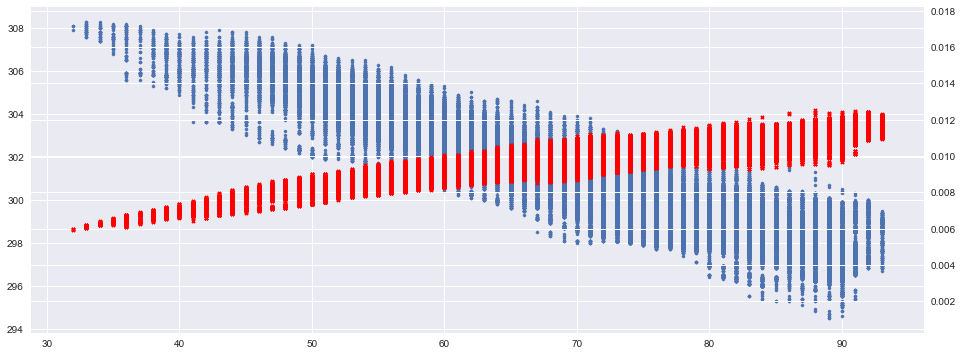

In [17]:
fig,ax = plt.subplots(figsize=(16,6))
ax.scatter(x=station_S06["relative-humidity"],y=station_S06["air-temperature"],marker="o",s=10)
ax1=ax.twinx()
ax1.scatter(x=station_S06["relative-humidity"],y=station_S06["specific-humidity"],marker="x",c="r",s=10)

In [18]:
outer_df["air-temperature"]+=273
outer_df["specific-humidity"] = 0.00003750722*np.exp((2500.8-2.36*outer_df["air-temperature"])/0.461*(1/273-1/outer_df["air-temperature"]))*outer_df["relative-humidity"]
outer_df

,station_id,air-temperature,timestamp_sgt,relative-humidity,specific-humidity
0,S109,300.4,2016-12-01 00:00:59,75.8,0.010418
1,S117,301.0,2016-12-01 00:00:59,73.7,0.010383
2,S50,300.3,2016-12-01 00:00:59,78.5,0.010744
3,S107,301.4,2016-12-01 00:00:59,78.4,0.011228
4,S43,301.2,2016-12-01 00:00:59,74.7,0.010611
5,S108,301.2,2016-12-01 00:00:59,74.4,0.010568
6,S44,299.4,2016-12-01 00:00:59,83.1,0.010956
7,S121,300.2,2016-12-01 00:00:59,87.2,0.011886
8,S106,299.8,2016-12-01 00:00:59,90.7,0.012159
9,S06,300.7,2016-12-01 00:00:59,69.0,0.009602


In [20]:
outer_dff = outer_df.set_index("timestamp_sgt",drop=True)
outer_dff

,station_id,air-temperature,relative-humidity,specific-humidity
timestamp_sgt,,,,
2016-12-01 00:00:59,S109,300.4,75.8,0.010418
2016-12-01 00:00:59,S117,301.0,73.7,0.010383
2016-12-01 00:00:59,S50,300.3,78.5,0.010744
2016-12-01 00:00:59,S107,301.4,78.4,0.011228
2016-12-01 00:00:59,S43,301.2,74.7,0.010611
2016-12-01 00:00:59,S108,301.2,74.4,0.010568
2016-12-01 00:00:59,S44,299.4,83.1,0.010956
2016-12-01 00:00:59,S121,300.2,87.2,0.011886
2016-12-01 00:00:59,S106,299.8,90.7,0.012159


In [21]:
daily_avg = outer_dff.resample("D").mean()

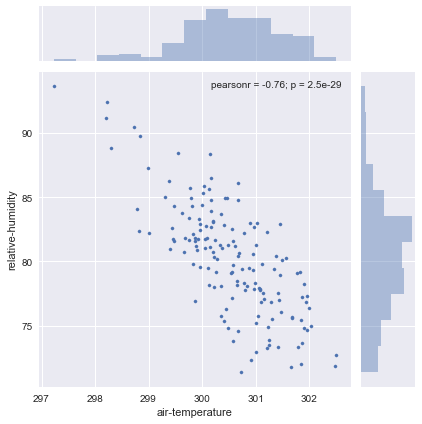

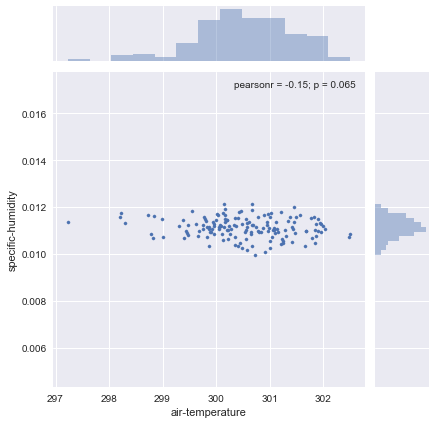

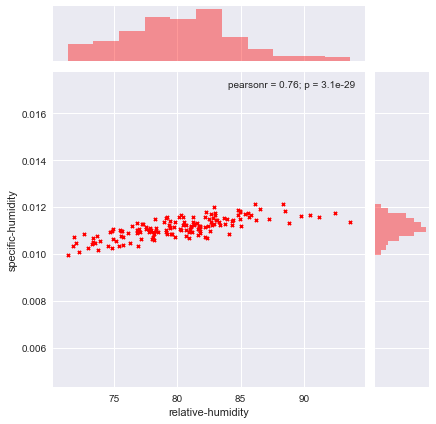

In [22]:
sns.jointplot(daily_avg["air-temperature"],daily_avg["relative-humidity"],s=10)
sns.jointplot(daily_avg["air-temperature"],daily_avg["specific-humidity"],s=10)
sns.jointplot(daily_avg["relative-humidity"],daily_avg["specific-humidity"],marker="x",color="r",s=10)

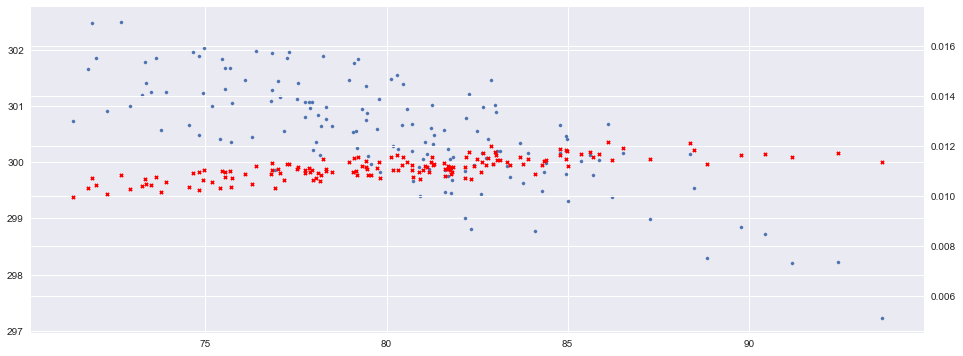

In [54]:
fig,ax = plt.subplots(figsize=(16,6))
ax.scatter(x=daily_avg["relative-humidity"],y=daily_avg["air-temperature"],marker="o",s=10)
ax1=ax.twinx()
ax1.scatter(x=daily_avg["relative-humidity"],y=daily_avg["specific-humidity"],marker="x",c="r",s=10)